In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown, Audio
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb
from larval_gonad.sounds import beep

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../scrnaseq-wf/data/scrnaseq_combine_force')

last updated: 2018-07-13 
Git hash: ac53eab8570ee235fc7e9d15c84d3e028437e0a6


In [3]:
from larval_gonad.cell_selection import build_umi_gene_count_table

def get_umi(rep):
    umi = build_umi_gene_count_table(f'../scrnaseq-wf/data/scrnaseq_samples/testis{rep}_force/outs/raw_gene_bc_matrices_h5.h5', 
                                     f'../scrnaseq-wf/data/scrnaseq_samples/testis{rep}_force/outs/molecule_info.h5')
    umi.sort_values('umi_cnt', inplace=True, ascending=False)
    umi['id'] = [x + 1 for x in range(umi.shape[0])]
    umi['rep'] = rep
    umi.index = [f'rep{rep}_' + x for x in umi.index]
    return umi

umi = pd.concat([
    get_umi(1),
    get_umi(2),
    get_umi(3),
])

clusters = nbconfig.seurat.get_clusters('res.0.6')
umi = umi.join(clusters)

In [80]:
def bcrank(rep, cluster, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
        
    dat = umi.query(f'rep == {rep}')
    clus = dat.query(f'cluster == {cluster}')
    
    dat.plot('id', 'umi_cnt', loglog=True, kind='scatter', s=10, color='lightgrey', ax=ax, **kwargs)
    try:
        clus.plot('id', 'umi_cnt', loglog=True, kind='scatter', s=10, color='g', ax=ax)
        ax.set_xlabel('')
    except ValueError:
        return

In [102]:
def umivio(cluster, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
        
    dat = umi.query(f'cluster == {cluster}').dropna()
    sns.violinplot('rep', 'umi_cnt', data=dat, ax=ax, **kwargs)
    ax.set_ylabel('')
    ax.text(0.5, .99, 'nUMI', ha='center', va='top', transform=ax.transAxes, fontsize=12)

In [103]:
def genevio(cluster, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
        
    dat = umi.query(f'cluster == {cluster}').dropna()
    sns.violinplot('rep', 'gene_cnt', data=dat, ax=ax, **kwargs)
    ax.set_ylabel('')
    ax.text(0.5, .99, 'nGene', ha='center', va='top', transform=ax.transAxes, fontsize=12)

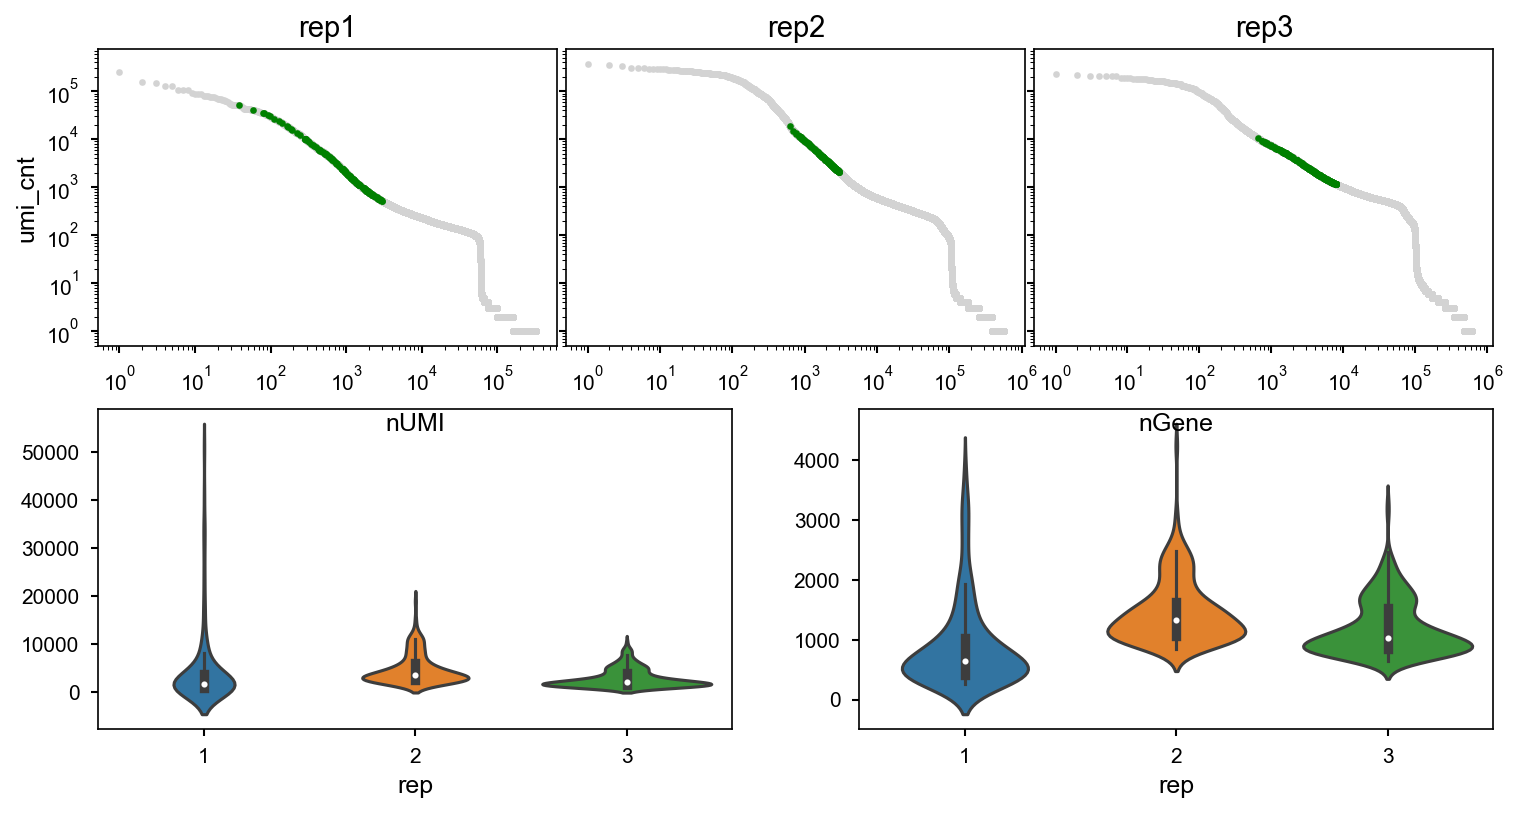

In [104]:
cluster = 9

fig = plt.figure(figsize=plt.figaspect(1/2))
gs1 = plt.GridSpec(1, 3, bottom=0.55, wspace=0.02)
gs2 = plt.GridSpec(1, 2, top=0.48)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1], sharey=ax1)
ax3 = plt.subplot(gs1[0, 2], sharey=ax1)
ax4 = plt.subplot(gs2[0, 0])
ax5 = plt.subplot(gs2[0, 1])

bcrank(1, cluster, ax1, title='rep1')
bcrank(2, cluster, ax2, title='rep2')
bcrank(3, cluster, ax3, title='rep3')
umivio(cluster, ax4)
genevio(cluster, ax5)

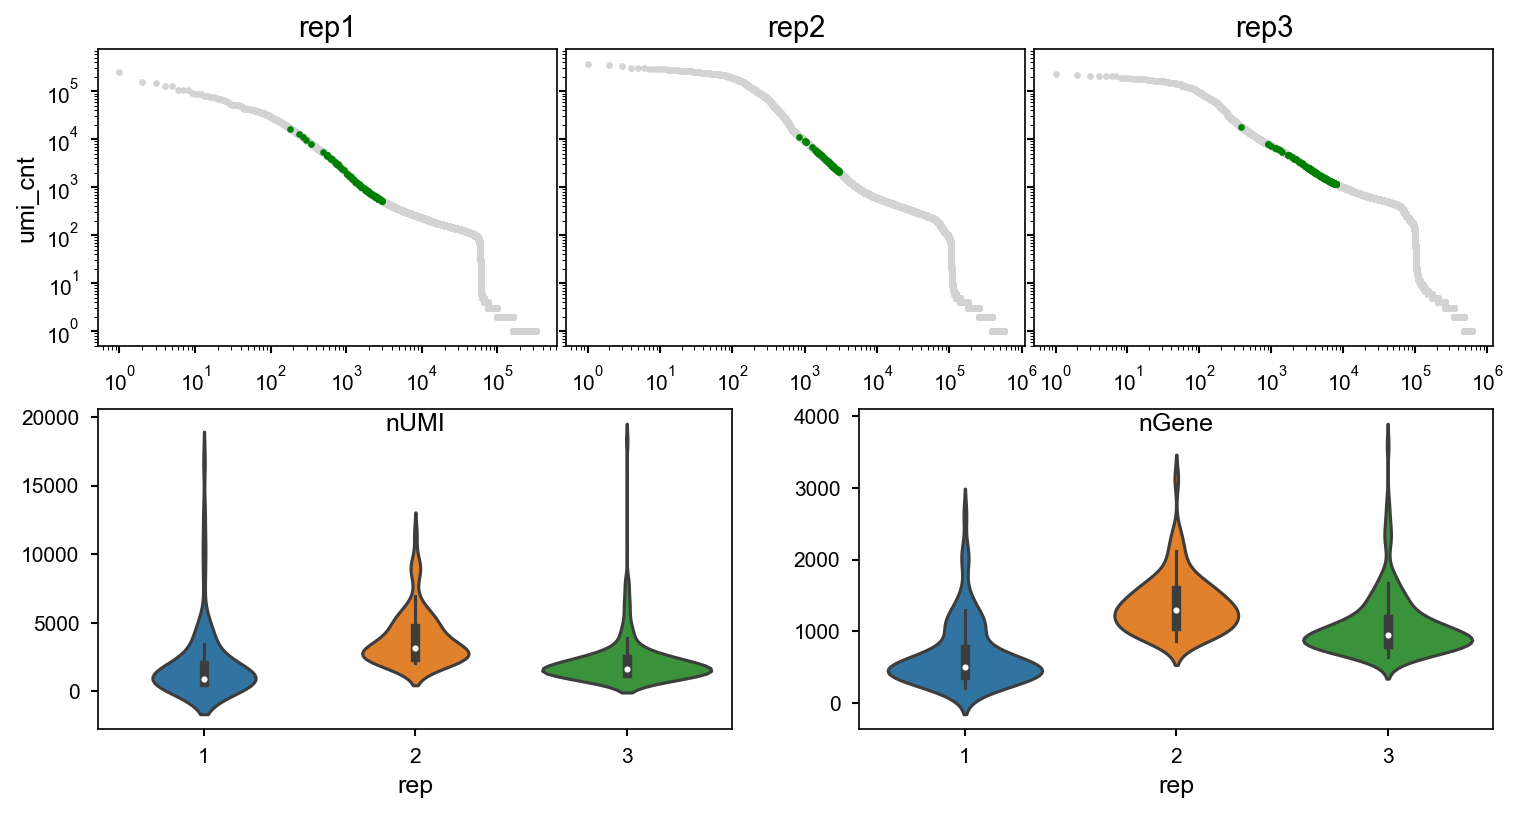

In [105]:
cluster = 10

fig = plt.figure(figsize=plt.figaspect(1/2))
gs1 = plt.GridSpec(1, 3, bottom=0.55, wspace=0.02)
gs2 = plt.GridSpec(1, 2, top=0.48)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1], sharey=ax1)
ax3 = plt.subplot(gs1[0, 2], sharey=ax1)
ax4 = plt.subplot(gs2[0, 0])
ax5 = plt.subplot(gs2[0, 1])

bcrank(1, cluster, ax1, title='rep1')
bcrank(2, cluster, ax2, title='rep2')
bcrank(3, cluster, ax3, title='rep3')
umivio(cluster, ax4)
genevio(cluster, ax5)

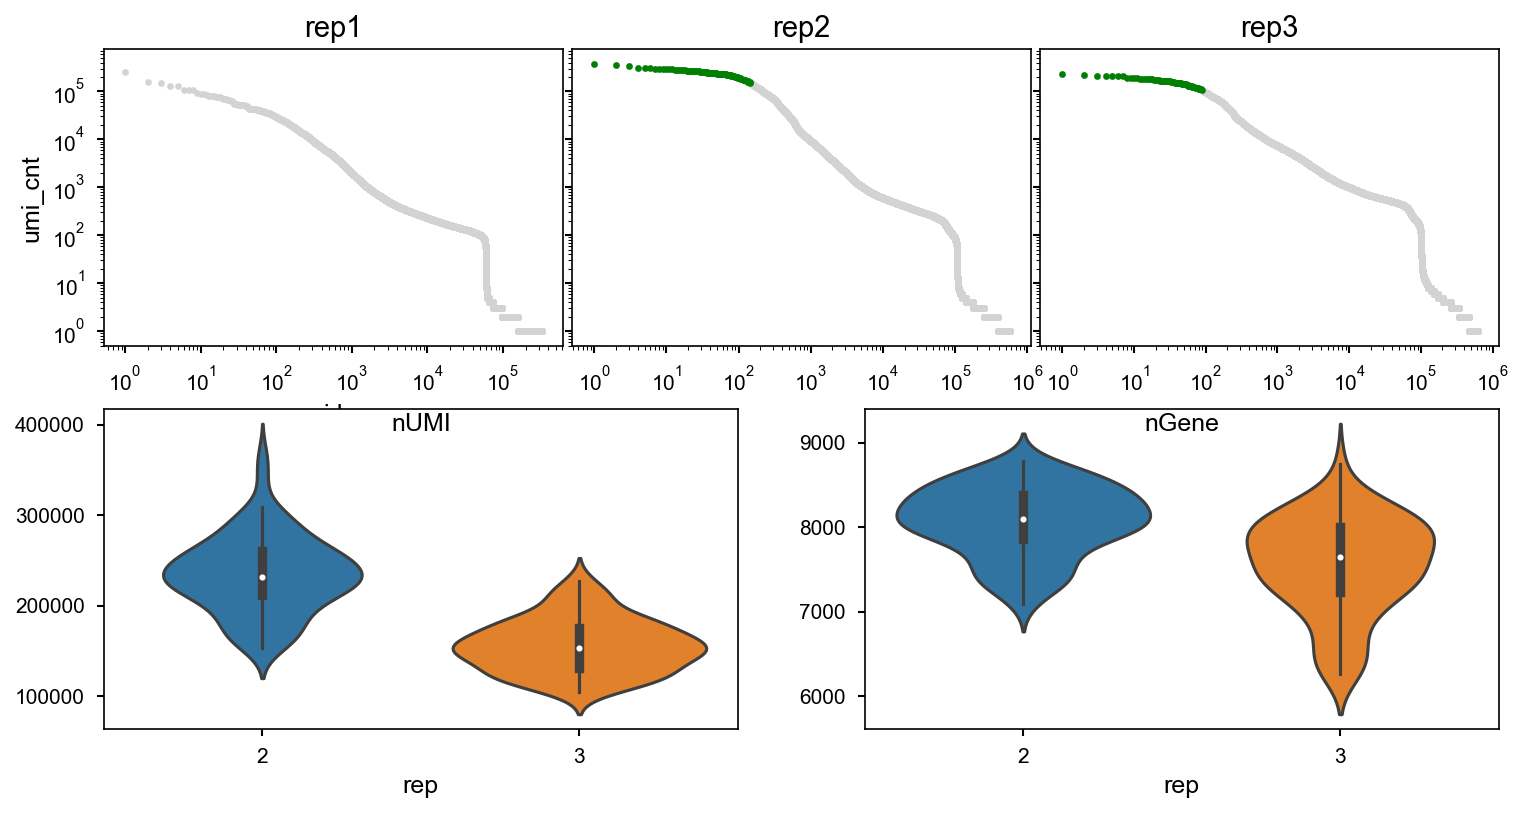

In [106]:
cluster = 11

fig = plt.figure(figsize=plt.figaspect(1/2))
gs1 = plt.GridSpec(1, 3, bottom=0.55, wspace=0.02)
gs2 = plt.GridSpec(1, 2, top=0.48)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1], sharey=ax1)
ax3 = plt.subplot(gs1[0, 2], sharey=ax1)
ax4 = plt.subplot(gs2[0, 0])
ax5 = plt.subplot(gs2[0, 1])

bcrank(1, cluster, ax1, title='rep1')
bcrank(2, cluster, ax2, title='rep2')
bcrank(3, cluster, ax3, title='rep3')
umivio(cluster, ax4)
genevio(cluster, ax5)

## DEG

In [8]:
biomarkers = nbconfig.seurat.get_biomarkers('res.0.6')

In [9]:
biomarkers.head()

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
FBgn,,,,,,,
FBgn0000014,abd-A,0.000000e+00,1.301701,0.687,0.120,0.000000e+00,8
FBgn0000014,abd-A,0.000000e+00,1.621922,0.709,0.108,0.000000e+00,7
FBgn0000015,Abd-B,0.000000e+00,1.793331,0.623,0.012,0.000000e+00,7
FBgn0000017,Abl,5.917697e-70,0.659322,0.399,0.193,8.566458e-66,7
FBgn0000017,Abl,7.998689e-38,0.419790,0.380,0.198,1.157890e-33,8


In [18]:
nbconfig.CLUSTER_ANNOT

{0: 'Late 1º Spermatocytes (0)',
 1: 'Mid Cyst Cells (1)',
 2: 'Mid 1º Spermatocytes (2)',
 3: 'Early 1º Spermatocytes (3)',
 4: 'Late Cyst Cells (4)',
 5: 'Early Cyst Cells (5)',
 6: 'Spermatogonia (6)',
 7: 'Terminal Epithelium (7)',
 8: 'Pigment Cells (8)',
 9: 'Unknown (9)',
 10: 'Unknown (10)',
 11: 'Unknown (11)'}

In [10]:
c11 = pd.read_csv('../output/2018-07-13_scrnaseq_11_vs_germcells_biomarkers.tsv', sep='\t', index_col=0)

In [12]:
c11.index.name = 'FBgn'

In [14]:
c11_genes = c11.query('avg_logFC >= 0').index.unique().tolist()

In [19]:
len(c11_genes)

968

In [22]:
biomarkers[biomarkers.index.isin(c11_genes)].cluster.value_counts()

11    964
2     943
0     675
3     547
4       6
8       4
9       3
1       3
7       2
5       2
10      2
Name: cluster, dtype: int64

In [21]:
biomarkers[biomarkers.index.isin(c11_genes)].sort_index()

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
FBgn,,,,,,,
FBgn0000064,Ald,3.233949e-84,0.421013,0.798,0.592,4.681465e-80,5
FBgn0000064,Ald,5.084456e-77,0.403284,0.737,0.595,7.360259e-73,2
FBgn0000064,Ald,8.830177e-28,0.379312,1.000,0.607,1.278256e-23,11
FBgn0000274,Pka-C2,8.750865e-138,0.574056,1.000,0.193,1.266775e-133,11
FBgn0000274,Pka-C2,3.281348e-114,0.485874,0.408,0.176,4.750079e-110,2
FBgn0000405,CycB,1.495722e-08,0.413904,0.301,0.290,2.165208e-04,0
FBgn0000405,CycB,6.575749e-86,0.620919,1.000,0.282,9.519054e-82,11
FBgn0000405,CycB,4.533658e-92,0.466798,0.492,0.264,6.562924e-88,2
FBgn0000405,CycB,1.540817e-137,0.405542,0.600,0.256,2.230487e-133,3
